In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from pandas import DataFrame

path = '/users/teddyandalex/documents/data_science/'
mooc_cols = ['course_id', 'userid_di', 'registered', 'viewed', 'explored', 'certified', 'final_cc_cname_di', 'loe_di', 'yob', 'gender', 'grade', 'start_time_di', 
'last_event_di', 'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts', 'roles', 'incomplete_flag']
mooc = path + 'HMXPC13_DI_v2_5-14-14.csv'
mooc_data = pd.read_csv(mooc, header=0, names=mooc_cols, na_values='NAN')
mooc_data.head()

/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,course_id,userid_di,registered,viewed,explored,certified,final_cc_cname_di,loe_di,yob,gender,grade,start_time_di,last_event_di,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,2013-11-17,NaN,9,NaN,NaN,0,NaN,1
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-15,NaN,NaN,9,NaN,1,0,NaN,1
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,2013-11-17,NaN,16,NaN,NaN,0,NaN,1
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-09-17,NaN,NaN,16,NaN,NaN,0,NaN,1
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,NaN,NaN,16,NaN,NaN,0,NaN,1


In [2]:
# create age variable

mooc_data['yob'].dtype
mooc_data['new_yob']=mooc_data.yob.convert_objects(convert_numeric=True)

mooc_data['age'] = 2013 - mooc_data['new_yob']

/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [3]:
mooc_data['outcome']=''

mooc_data.loc[(mooc_data['viewed'] == 1) & (mooc_data['explored'] == 0) & (mooc_data['certified'] == 0),'outcome']=1
mooc_data.loc[(mooc_data['viewed'] == 1) & (mooc_data['explored'] == 1) & (mooc_data['certified'] == 0),'outcome']=2
mooc_data.loc[(mooc_data['viewed'] == 0) & (mooc_data['explored'] == 1) & (mooc_data['certified'] == 0),'outcome']=2
mooc_data.loc[(mooc_data['viewed'] == 1) & (mooc_data['explored'] == 1) & (mooc_data['certified'] == 1),'outcome']=3
mooc_data.loc[(mooc_data['viewed'] == 1) & (mooc_data['explored'] == 0) & (mooc_data['certified'] == 1),'outcome']=3
mooc_data.loc[(mooc_data['viewed'] == 0) & (mooc_data['explored'] == 0) & (mooc_data['certified'] == 0),'outcome']=0

counts = mooc_data['outcome'].value_counts(sort = False)  
print counts

0    240868
1    359894
2     22689
3     17687
Name: outcome, dtype: int64


In [4]:
# look at courses - JUSTICE
mooc_data.course_id.value_counts()   
justice = mooc_data.loc[mooc_data.course_id == "HarvardX/ER22x/2013_Spring"]

# Look at class interaction variables
 #'start_time_di', 'last_event_di', 'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts', 'roles', 'time_elapse',  

justice.describe()




,registered,viewed,explored,certified,yob,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag,new_yob,age
count,57406,57406.000000,57406.000000,57406.000000,50020.000000,42332.000000,44848.000000,0,32108.000000,57406.000000,0,2685,50020.000000,50020.000000
mean,1,0.560238,0.061527,0.040867,1983.372871,171.887626,4.789355,NaN,6.480970,0.048862,NaN,1,1983.372871,29.627129
std,0,0.496362,0.240296,0.197983,11.053471,401.490641,8.343541,NaN,8.420597,0.320698,NaN,0,11.053471,11.053471
min,1,0.000000,0.000000,0.000000,1931.000000,1.000000,1.000000,NaN,1.000000,0.000000,NaN,1,1931.000000,0.000000
25%,1,0.000000,0.000000,0.000000,1980.000000,4.000000,1.000000,NaN,2.000000,0.000000,NaN,1,1980.000000,22.000000
50%,1,1.000000,0.000000,0.000000,1987.000000,26.000000,2.000000,NaN,3.000000,0.000000,NaN,1,1987.000000,26.000000
75%,1,1.000000,0.000000,0.000000,1991.000000,128.000000,4.000000,NaN,6.000000,0.000000,NaN,1,1991.000000,33.000000
max,1,1.000000,1.000000,1.000000,2013.000000,5926.000000,128.000000,NaN,34.000000,7.000000,NaN,1,2013.000000,82.000000


In [5]:
#run model on Justice course dataset
from pandas import DataFrame

from sklearn.cluster import KMeans
#preprocessing
#replace NaNs to 0s

list = ['nevents', 'ndays_act', 'nchapters', 'nforum_posts']
for what in range(0,len(list)):
    justice[list[what]].fillna(0, inplace = True)
for what in range(0,len(list)):
    print pd.isnull(justice[list[what]]).value_counts()


False    57406
Name: nevents, dtype: int64
False    57406
Name: ndays_act, dtype: int64
False    57406
Name: nchapters, dtype: int64
False    57406
Name: nforum_posts, dtype: int64


/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [6]:
#converting variables into z-scores
justice['nfor_posts']=pd.Series.astype(justice['nforum_posts'],'float64')
list = ['nevents', 'ndays_act', 'nchapters', 'nfor_posts']
from sklearn import preprocessing
listz = ['znevents', 'zndays_act', 'znchapters', 'znforum_posts']

for what in range(0,len(listz)):
    justice[listz[what]] = preprocessing.scale(justice[list[what]])
    
for X in range(0, len(listz)):
    print justice[listz[X]].describe()

count    5.740600e+04
mean     1.856490e-16
std      1.000009e+00
min     -3.591058e-01
25%     -3.591058e-01
50%     -3.364408e-01
75%     -1.522874e-01
max      1.643001e+01
Name: znevents, dtype: float64
count    5.740600e+04
mean     1.239116e-14
std      1.000009e+00
min     -4.900162e-01
25%     -3.590535e-01
50%     -3.590535e-01
75%     -9.712811e-02
max      1.627321e+01
Name: zndays_act, dtype: float64
count    5.740600e+04
mean    -1.561590e-15
std      1.000009e+00
min     -5.125833e-01
25%     -5.125833e-01
50%     -3.711771e-01
75%     -8.836470e-02
max      4.295227e+00
Name: znchapters, dtype: float64
count    5.740600e+04
mean    -1.091273e-14
std      1.000009e+00
min     -1.523643e-01
25%     -1.523643e-01
50%     -1.523643e-01
75%     -1.523643e-01
max      2.167522e+01
Name: znforum_posts, dtype: float64


/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
#drop outliers
print justice.shape
justice['nevents'].describe()
justice = justice[justice['nevents'] < 3000]
print justice.shape

(57406, 28)
(57336, 28)


In [8]:
#Run kmeans model
from scipy.spatial import distance
from sklearn.cluster import KMeans
feature_cols = listz
X = justice[feature_cols]
k_means = KMeans(n_clusters=2)
k_means.fit(X)
labels = k_means.labels_
centroids = k_means.cluster_centers_
iner = k_means.inertia_
pd.value_counts(labels)
justice['Cluster Class_KM'] = pd.Series(labels, index=justice.index)
print centroids.shape
print centroids
print labels.shape

#tss = sum(distance.pdist(X)**2)/X.shape[0]


(2, 4)
[[-0.22000397 -0.20123288 -0.23012773 -0.04587036]
 [ 2.88599658  2.67546115  3.13017262  0.61988396]]
(57336,)


In [9]:
# set up function to plot silhouette score against number of clusters
from sklearn import metrics
from sklearn.cluster import KMeans
feature_cols = ['znevents', 'zndays_act', 'znchapters']
X = justice[feature_cols]
X_samp = X.sample(n=10000, replace=False, random_state=3, axis=0)
ran = range(0,10000)
key = [ran]
X_samp.set_index(key, drop=True, inplace = True)

def k_sil(xv,kran):
    ksil_tuple = []
    for kr in kran:
        k_means = KMeans(n_clusters = kr)
        k_means.fit(xv)
        labels = k_means.labels_
        sil = metrics.silhouette_score(xv, labels)
        ksil_tuple.append((kr,sil))
        print kr
    return ksil_tuple

In [10]:
k_range = range(2,11)
k_sil2 = k_sil(X_samp,k_range)
print k_sil2

2
3
4
5
6
7
8
9
10
[(2, 0.84271701017892142), (3, 0.7489270466625132), (4, 0.67490206790986662), (5, 0.62406591491558572), (6, 0.62789024988329289), (7, 0.53169612138879652), (8, 0.49365736569603708), (9, 0.49541734938368209), (10, 0.49599273233348878)]


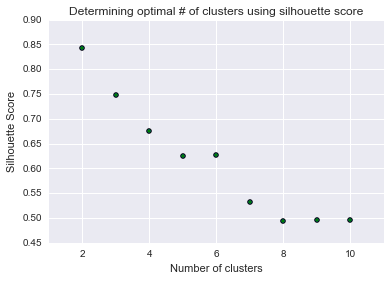

In [11]:
#graph silhouette score against # of clusters
import matplotlib.pyplot as plt
%matplotlib inline 
r = []
s = []
for km, ss in k_sil2:
    r.append(km)
    s.append(ss)

plt.title('Determining optimal # of clusters using silhouette score')
plt.ylabel('Silhouette Score')
plt.xlabel('Number of clusters')
plt.scatter(r, s, linewidths = 1)
plt.plot(r,s,'.g')

In [12]:
#Set variables for plot
#print tss
rkm = justice['Cluster Class_KM']
x=justice['znevents']
y=justice['zndays_act']
z=justice['znchapters']
list = [x,y,z]
print justice['outcome'].value_counts(sort = False)
justice['Cluster Class_KM'].value_counts()

0    25245
1    28175
2     1632
3     2284
Name: outcome, dtype: int64


0    53496
1     3840
Name: Cluster Class_KM, dtype: int64

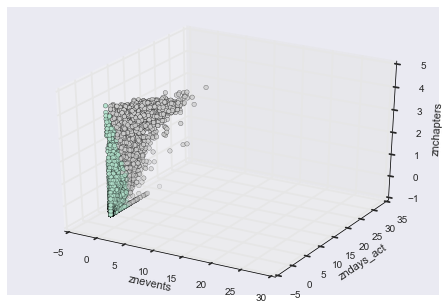

In [13]:
#plot justice Kmeans results 

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim([-5,30])
ax.set_ylim([-5, 35])

ax.set_xlabel('znevents')
ax.set_ylabel('zndays_act')
ax.set_zlabel('znchapters')
print ax.scatter(x,y,z, c=rkm, cmap=plt.cm.Pastel2)


In [14]:
# Compare clusters with course outcomes
#Set variables for plot

rkm = justice['outcome']
x=justice['znevents']
y=justice['zndays_act']
z=justice['znchapters']
list = [x,y,z]

justice['Cluster Class_KM'].value_counts()
justice['outcome'].value_counts(sort = False)


0    25245
1    28175
2     1632
3     2284
Name: outcome, dtype: int64

/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


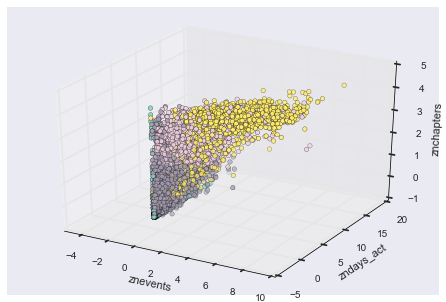

In [15]:
#plot Justice outcomes against course interaction vars - 
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
plt.title('Justice Course Outcomes against Course Interaction Vars')
ax = Axes3D(fig)
ax.set_xlim([-5,10])
ax.set_ylim([-5, 20])
ax.set_xlabel('znevents')
ax.set_ylabel('zndays_act')
ax.set_zlabel('znchapters')
print ax.scatter(x,y,z, c=rkm, cmap=plt.cm.Set3)
plt.grid(True)
plt.legend()
plt.show()



(25245,)
(2284,)


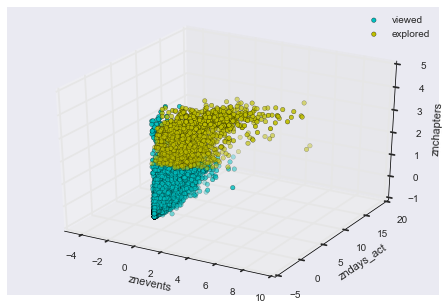

In [16]:
#show groups separately

r0 = justice[justice['outcome']==0]
r1 = justice[justice['outcome']==1]
r2 = justice[justice['outcome']==2]
r3 = justice[justice['outcome']==3]
x0 = r0['znevents']
x1 = r1['znevents']
x2 = r2['znevents']
x3 = r3['znevents']
y0 = r0['zndays_act']
y1 = r1['zndays_act']
y2 = r2['zndays_act']
y3 = r3['zndays_act']
z0 = r0['znchapters']
z1 = r1['znchapters']
z2 = r2['znchapters']
z3 = r3['znchapters']
print y0.shape
print y3.shape
colors = ['blue', 'green', 'magenta', 'cyan']
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim([-5,10])
ax.set_ylim([-5, 20])
ax.set_xlabel('znevents')
ax.set_ylabel('zndays_act')
ax.set_zlabel('znchapters')
#first =  ax.scatter(x0,y0,z0, c = 'g')
second = ax.scatter(x1,y1,z1,  c = 'c')
third = ax.scatter(x2,y2,z2, c = 'y')
#fourth = ax.scatter(x3,y3,z3, c = 'm')
plt.legend((second, third),('viewed','explored'))
plt.show()

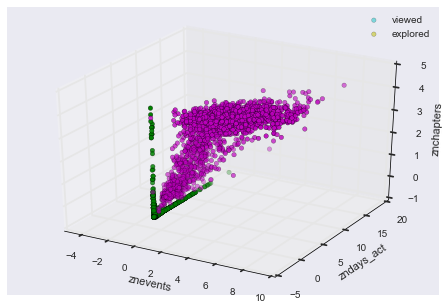

In [17]:
# show registered and certified groups separately
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim([-5,10])
ax.set_ylim([-5, 20])
ax.set_xlabel('znevents')
ax.set_ylabel('zndays_act')
ax.set_zlabel('znchapters')
first =  ax.scatter(x0,y0,z0, c = 'g')
fourth = ax.scatter(x3,y3,z3, c = 'm')
plt.legend((second, third),('viewed','explored'))
plt.show()

In [18]:
#characterize kmeans groups

#cs50.nevents.groupby('Cluster_labels').mean()
list = ['nevents', 'ndays_act', 'nchapters', 'nforum_posts']
for Z in range(0,len(list)):
    print list[Z]
    print justice[list[Z]].groupby(justice['Cluster Class_KM']).describe()
    print justice['outcome'].groupby(justice['Cluster Class_KM']).value_counts()

nevents
Cluster Class_KM       
0                 count    53496.000000
                  mean        49.098306
                  std         97.410686
                  min          0.000000
                  25%          0.000000
                  50%          5.000000
                  75%         48.000000
                  max       1022.000000
1                 count     3840.000000
                  mean      1145.413021
                  std        619.213299
                  min          0.000000
                  25%        651.750000
                  50%       1062.000000
                  75%       1538.500000
                  max       2988.000000
dtype: float64
Cluster Class_KM   
0                 1    27675
                  0    25185
                  3      374
                  2      262
1                 3     1910
                  2     1370
                  1      500
                  0       60
dtype: int64
ndays_act
Cluster Class_KM       
0             

In [19]:
#create survival function
%matplotlib inline 
chapters = justice['nchapters']
table1 = pd.Series.value_counts(chapters, sort = False)
print table1


0     25298
1      5366
2      8463
3      5105
4      2341
5      1691
6      1162
7       966
8       677
9       530
10      492
11      398
12      296
13      257
14      251
15      229
16      214
17      146
18      151
19      123
20      116
21      107
22      102
23      114
24      117
25      157
26      152
27      198
28      169
29      157
30      146
31      350
32      611
33      455
34      229
Name: nchapters, dtype: int64


In [20]:
sum1 = pd.Series.sum(table1)
zero = 0
sum = sum1
table2 = []
for k in range(0,35):
    index_tot = (table1.ix[k:34].sum())
    per_drop = table1.ix[k]/(index_tot*1.0)
    table2.append((k,per_drop))
print table2

[(0, 0.44122366401562718), (1, 0.16748860727885637), (2, 0.31729904019196159), (3, 0.28035586797737383), (4, 0.17864774114774115), (5, 0.15711232927622409), (6, 0.12808641975308643), (7, 0.12212389380530973), (8, 0.09749423963133641), (9, 0.084569969682463705), (10, 0.085759107547498686), (11, 0.075881792183031455), (12, 0.061068702290076333), (13, 0.056471105251593059), (14, 0.05845365626455519), (15, 0.056641108088053428), (16, 0.056109071840587312), (17, 0.040555555555555553), (18, 0.043717429067747539), (19, 0.037238873751135333), (20, 0.036477987421383647), (21, 0.034921671018276763), (22, 0.034494420020290836), (23, 0.039929947460595444), (24, 0.042685151404596861), (25, 0.059832317073170729), (26, 0.061613295500608026), (27, 0.085529157667386613), (28, 0.079829948039678786), (29, 0.080595482546201233), (30, 0.081518704634282527), (31, 0.21276595744680851), (32, 0.47181467181467179), (33, 0.66520467836257313), (34, 1.0)]


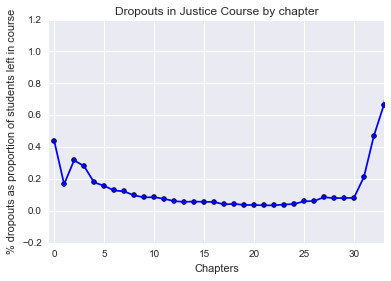

In [21]:
#plot survival function
r = []
s = []
for i,va in table2:
    r.append(i)
    s.append(va)
plt.minorticks_on()
plt.title('Dropouts in Justice Course by chapter')
plt.ylabel('% dropouts as proportion of students left in course')
plt.xlim(xmax=33)
plt.xlim(xmin=-.5)
plt.xlabel('Chapters')
plt.scatter(r, s, linewidths = 1)
plt.plot(r,s,'.b',linestyle='solid')

In [22]:
# determining optimal number of clusters
from sklearn.cluster import KMeans
k_range = range(1,11)
feature_cols = listz
X = justice[feature_cols]
def k_var(xv,kran):
    kiner_tuple = []
    kiner_perc = []
    for kr in kran:
        k_means = KMeans(n_clusters = kr)
        k_means.fit(xv)
        iner = k_means.inertia_
        #perc = iner/tss
        kiner_tuple.append((kr,iner))
        #kiner_perc.append(perc)
        print kr
        #print perc
    return kiner_tuple
    
k_tup = k_var(X,k_range)


1
2
3
4
5
6
7
8
9
10


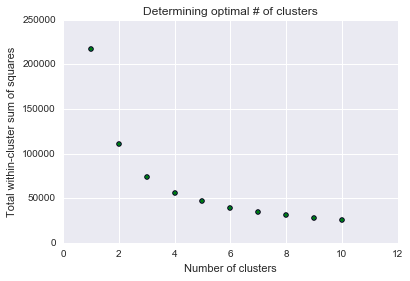

In [23]:
#Plot this to find point where marginal gain in variance explains drops (elbow)
import matplotlib.pyplot as plt

r = []
s = []
for km, ss in k_tup:
    r.append(km)
    s.append(ss)

plt.title('Determining optimal # of clusters')
plt.ylabel('Total within-cluster sum of squares')
plt.xlabel('Number of clusters')
plt.scatter(r, s, linewidths = 1)
plt.plot(r,s,'.g')
plt.show()


In [24]:
#Prediction
#create dummies for country, female, highest degree
attr = ['final_cc_cname_di', 'gender' ,'loe_di']
for Q in range(0,len(attr)):
    justice[attr[Q]].value_counts()

justice.final_cc_cname_di.value_counts()
dummies_gender=pd.get_dummies(justice.gender, prefix = 'gd')
justice = pd.concat([justice, dummies_gender], axis = 1)

dummies_country= pd.get_dummies(justice.final_cc_cname_di, prefix = 'cty')
justice = pd.concat([justice, dummies_country], axis = 1)

dummies_deg = pd.get_dummies(justice.loe_di, prefix = 'deg')
justice = pd.concat([justice, dummies_deg], axis = 1)

print justice.ix[:,20:].head()




    new_yob  age outcome  nfor_posts  znevents  zndays_act  znchapters  \
4       NaN  NaN       0           0 -0.359106    1.605387   -0.512583   
10      NaN  NaN       1           0 -0.310943   -0.228091   -0.229771   
11      NaN  NaN       1           0 -0.268446   -0.359053   -0.088365   
14      NaN  NaN       1           0 -0.138122    0.164797    0.053041   
23      NaN  NaN       1           0 -0.316609   -0.228091   -0.229771   

    znforum_posts  Cluster Class_KM  gd_f      ...        cty_Spain  \
4       -0.152364                 0     0      ...                0   
10      -0.152364                 0     0      ...                0   
11      -0.152364                 0     0      ...                0   
14      -0.152364                 0     0      ...                0   
23      -0.152364                 0     0      ...                0   

    cty_Ukraine  cty_United Kingdom  cty_United States  cty_Unknown/Other  \
4             0                   0                

In [25]:
#create list for country dummies

country = justice.final_cc_cname_di.value_counts()
cty_list = []
for index, values in pd.Series.iteritems(country):
    cty1 = 'cty_' + index
    cty_list.append(cty1)

print cty_list


['cty_United States', 'cty_Unknown/Other', 'cty_Other Europe', 'cty_India', 'cty_United Kingdom', 'cty_Brazil', 'cty_Other East Asia', 'cty_Canada', 'cty_Other South Asia', 'cty_Other Middle East/Central Asia', 'cty_Other Africa', 'cty_Germany', 'cty_China', 'cty_Japan', 'cty_Spain', 'cty_Australia', 'cty_Other South America', 'cty_France', 'cty_Greece', 'cty_Russian Federation', 'cty_Pakistan', 'cty_Philippines', 'cty_Poland', 'cty_Nigeria', 'cty_Mexico', 'cty_Ukraine', 'cty_Colombia', 'cty_Other North & Central Amer., Caribbean', 'cty_Indonesia', 'cty_Egypt', 'cty_Morocco', 'cty_Bangladesh', 'cty_Portugal', 'cty_Other Oceania']


In [26]:
#prepare other variables for prediction
import copy
list = ['gd_f', 'deg_Doctorate', 'deg_Less than Secondary', "deg_Master's", 'deg_Secondary', "deg_Bachelor's", "age"]

for item in range(0,len(cty_list)):
    list.append(cty_list[item])
feature_cols = copy.copy(list)
print feature_cols



for what in range(0,len(list)):
    justice[list[what]].fillna(0, inplace = True)


['gd_f', 'deg_Doctorate', 'deg_Less than Secondary', "deg_Master's", 'deg_Secondary', "deg_Bachelor's", 'age', 'cty_United States', 'cty_Unknown/Other', 'cty_Other Europe', 'cty_India', 'cty_United Kingdom', 'cty_Brazil', 'cty_Other East Asia', 'cty_Canada', 'cty_Other South Asia', 'cty_Other Middle East/Central Asia', 'cty_Other Africa', 'cty_Germany', 'cty_China', 'cty_Japan', 'cty_Spain', 'cty_Australia', 'cty_Other South America', 'cty_France', 'cty_Greece', 'cty_Russian Federation', 'cty_Pakistan', 'cty_Philippines', 'cty_Poland', 'cty_Nigeria', 'cty_Mexico', 'cty_Ukraine', 'cty_Colombia', 'cty_Other North & Central Amer., Caribbean', 'cty_Indonesia', 'cty_Egypt', 'cty_Morocco', 'cty_Bangladesh', 'cty_Portugal', 'cty_Other Oceania']


In [28]:
#KNN Prediction - trial run
from sklearn.neighbors import KNeighborsClassifier
# make an instance of a KNeighborsClassifier object
# feature_cols defined above
feature_cols1 = ['gd_f', 'deg_Doctorate', 'deg_Less than Secondary', "deg_Master's", 'deg_Secondary', 
                 'age', 'cty_Unknown/Other', 'cty_Other Europe', 
                 'cty_India', 'cty_United Kingdom', 'cty_Brazil', 'cty_Other East Asia', 'cty_Canada', 
                 'cty_Other South Asia', 'cty_Other Middle East/Central Asia', 'cty_Other Africa', 'cty_Germany',
                 'cty_China', 'cty_Japan', 'cty_Spain', 'cty_Australia', 'cty_Other South America', 'cty_France', 
                 'cty_Greece', 'cty_Russian Federation', 'cty_Pakistan', 'cty_Philippines', 'cty_Poland', 
                 'cty_Nigeria', 
                 'cty_Mexico', 'cty_Ukraine', 'cty_Colombia', 'cty_Other North & Central Amer., Caribbean', 
                 'cty_Indonesia', 'cty_Egypt', 'cty_Morocco', 'cty_Bangladesh', 'cty_Portugal', 'cty_Other Oceania']
X = justice[feature_cols1]
y = justice['outcome']

knn = KNeighborsClassifier(n_neighbors=77)
type(knn)
knn.fit(X, y)
y_pc = knn.predict(X)

print X.dtypes
print y.dtype
yint=y.astype('int64')
print y.value_counts()

gd_f                                          float64
deg_Doctorate                                 float64
deg_Less than Secondary                       float64
deg_Master's                                  float64
deg_Secondary                                 float64
age                                           float64
cty_Unknown/Other                             float64
cty_Other Europe                              float64
cty_India                                     float64
cty_United Kingdom                            float64
cty_Brazil                                    float64
cty_Other East Asia                           float64
cty_Canada                                    float64
cty_Other South Asia                          float64
cty_Other Middle East/Central Asia            float64
cty_Other Africa                              float64
cty_Germany                                   float64
cty_China                                     float64
cty_Japan                   

In [29]:
print pd.Series(y_pc).value_counts()

1    40757
0    16579
dtype: int64


In [30]:
# Evaluation KNN Predictions Using Train-Test Split
#define function for 1 KNN evaluation using accuracy score
from sklearn.cross_validation import train_test_split
from sklearn import metrics
def eval_knn(Xf, yf, rand, nn):
    X_tr, X_te, y_tr, y_te = train_test_split(Xf, yf, random_state=rand)
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_tr, y_tr)
    y_pc = knn.predict(X_te)
    met = (metrics.accuracy_score(y_te, y_pc))
    return met
eval_knn(X,yint,7, 5)

0.54562578484721636

In [31]:
#Tuning
#define function for multiple KNN evaluations, varying on n_neighbors, this time n_neighbors is an array

def eval_knn_nn(Xf, yf, rand, nnl):
    nmet_tuple = []
    for value in nnl:
        print value
        measure = eval_knn(Xf, yf, rand, value)
        nmet_tuple.append((value, measure))
    return nmet_tuple
    

In [32]:
nnlist = np.arange(60,100)
test = eval_knn_nn(X,yint,150,nnlist)
print test


60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[(60, 0.58015906236919212), (61, 0.5816938747035022), (62, 0.58071717594530492), (63, 0.58008929817217803), (64, 0.581554346309474), (65, 0.58315892284079807), (66, 0.58392632900795316), (67, 0.58357750802288266), (68, 0.58281010185572768), (69, 0.5812752895214176), (70, 0.58553090553927722), (71, 0.5818334030975304), (72, 0.58413562159899535), (73, 0.5814148179154458), (74, 0.58406585740198136), (75, 0.58476349937212224), (76, 0.58308915864378397), (77, 0.58615878331240412), (78, 0.58476349937212224), (79, 0.58413562159899535), (80, 0.58490302776615044), (81, 0.58357750802288266), (82, 0.58287986605274178), (83, 0.58029859076322032), (84, 0.58190316729454439), (85, 0.58239151667364308), (86, 0.58099623273336121), (87, 0.58239151667364308), (88, 0.58050788335426262), (89, 0.58099623273336121), (90, 0.5816241105064881), (91, 0.57967071299009343), (92, 0.580647411748290

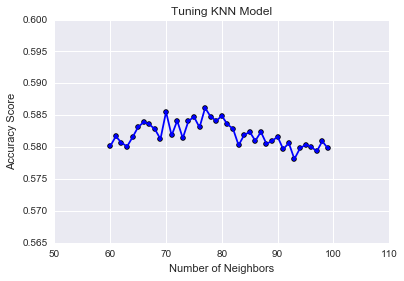

In [33]:
#plot results
import matplotlib.pyplot as plt
n = []
v = []
for neigh, val in test:
    n.append(neigh)
    v.append(val)

plt.title('Tuning KNN Model')
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Neighbors')
plt.scatter(n, v, linewidths = 1)
plt.plot(n,v,'.b-')
plt.show()


In [34]:
#Logistic  Regression Model
# fit a logistic regression model and store the class predictions
#feature_cols defined above
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols1 = ['gd_f', 'deg_Doctorate', 'deg_Less than Secondary',
                  "deg_Master's", 'deg_Secondary', #"deg_Bachelor's",
 'age', 'cty_Unknown/Other', #'cty_United States'
 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 
 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 
 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 
 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 
 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece',
 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']
X = justice[feature_cols1]
y = justice['outcome']
logreg.fit(X, y)
justice['log_pred_class'] = logreg.predict(X)
justice['log_pred_class'].value_counts()

1    48966
0     8370
Name: log_pred_class, dtype: int64

In [35]:
# Examine Coefficients
print feature_cols1
print len(feature_cols1)
zip(logreg.coef_)

['gd_f', 'deg_Doctorate', 'deg_Less than Secondary', "deg_Master's", 'deg_Secondary', 'age', 'cty_Unknown/Other', 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece', 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']
39


[(array([  1.55613910e-01,  -3.17642817e-01,  -4.13509102e-01,
          -8.56949315e-02,  -3.68792911e-02,   4.47790366e-03,
           4.18759851e+00,  -1.89118742e-01,  -4.92067527e-01,
           2.02117148e-01,  -1.86806506e-01,  -2.23434505e-01,
          -3.08340593e-01,  -9.01655165e-02,  -3.51782646e-01,
          -2.70105414e-01,   4.23196063e-01,   3.71337362e-01,
          -2.49859686e-01,  -4.34611508e-01,  -1.93908800e-01,
          -3.59514577e-03,  -4.42788024e-02,  -7.92118510e-01,
          -2.91255084e-01,   5.93330963e-02,  -4.97231701e-01,
          -1.14261866e-01,  -1.35852053e-01,  -2.64406824e-01,
          -6.44172594e-01,  -4.58266418e-01,  -3.58347156e-01,
          -1.61803304e-01,   2.17612896e-01,   4.47095390e-01,
          -2.13343853e-01,  -4.77679475e-01,   6.38509178e-01]),),
 (array([-0.06512521,  0.25939572,  0.22072751,  0.06682197,  0.03484889,
         -0.00433663, -4.07913734,  0.0890224 ,  0.23347972, -0.22988967,
          0.07911808,  0.1669

In [36]:
#evaluate model
#cross validation score - doesn't work with multiclass format
#use accuracy score
# Evaluation logistic model Using Train-Test Split and accuracy scores
from sklearn.cross_validation import train_test_split
from sklearn import metrics
def eval_log(Xf, yf, rand):
    X_tr, X_te, y_tr, y_te = train_test_split(Xf, yf, random_state=rand)
    logreg = LogisticRegression()
    logreg.fit(X_tr, y_tr)
    y_pc = logreg.predict(X_te)
    met = (metrics.accuracy_score(y_te, y_pc))
    print metrics.accuracy_score(y_te, y_pc)
    return met
eval_log(X,yint,7)

0.589926049951


0.58992604995116504

In [37]:
#create different versions of feature vectors and test models
feature_cols1 = ['gd_f', 'deg_Doctorate', #deg_Less than Secondary'
                  "deg_Master's", 'deg_Secondary', #"deg_Bachelor's",
 'age', 'cty_Unknown/Other', #'cty_United States'
 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 
 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 
 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 
 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 
 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece',
 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']
feature_cols2 = ['gd_f', 'deg_Doctorate', 'deg_Less than Secondary',
"deg_Master's", 'deg_Secondary', "deg_Bachelor's", 'age', 'cty_Unknown/Other', 'cty_United States']
feature_cols3 = ['gd_f', 'deg_Doctorate', 'deg_Less than Secondary',
"deg_Master's", 'deg_Secondary', "deg_Bachelor's", 'age', 'cty_United States']
X1 = justice[feature_cols1]
X2=justice[feature_cols2]
X3 = justice[feature_cols3]
eval_log(X1,yint,7)
eval_log(X2,yint,7)
eval_log(X3, yint,7)

0.590832984512
0.586716896889
0.491698060555


0.491698060555323

In [38]:
#Try using random forest classifier to see if it's more accurate
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier()
rfcl

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
X = justice[feature_cols1]
y = justice['outcome']

rfcl = RandomForestClassifier(n_estimators=240, random_state=1)
rfcl.fit(X, y)
y_pc = rfcl.predict(X)
print y_pc

[1 1 1 ..., 0 1 1]


In [40]:
print pd.Series(y_pc).value_counts()

1    40977
0    16305
3       28
2       26
dtype: int64


In [42]:
# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

from sklearn.cross_validation import train_test_split
from sklearn import metrics
def eval_rf(Xf, yf, rand, est):
    rf_tuple = []
    X_tr, X_te, y_tr, y_te = train_test_split(Xf, yf, random_state=rand)
    y_tr2=y_tr.astype(int)
    y_te2=y_te.astype(int)
    for r in est:
        rfcl = RandomForestClassifier(n_estimators=r, random_state=1)
        rfcl.fit(X_tr, y_tr2)
        y_pc = rfcl.predict(X_te)
        y_pc2 = y_pc.astype(int)
        met = (metrics.accuracy_score(y_te2, y_pc2))
        rf_tuple.append((r, met))
        print r
    return rf_tuple



In [43]:
test = eval_rf(X,y,150,estimator_range)
print test

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
[(10, 0.57011301799916281), (20, 0.57227570810659967), (30, 0.57206641551555737), (40, 0.57213617971257147), (50, 0.57325240686479695), (60, 0.57353146365285335), (70, 0.57262452909167016), (80, 0.57297335007674066), (90, 0.57318264266778285), (100, 0.57269429328868426), (110, 0.57269429328868426), (120, 0.57283382168271246), (130, 0.57262452909167016), (140, 0.57213617971257147), (150, 0.57220594390958557), (160, 0.57276405748569836), (170, 0.57164783033347288), (180, 0.57143853774243059), (190, 0.57171759453048698), (200, 0.57129900934840239), (210, 0.57136877354541649), (220, 0.57178735872750108), (230, 0.57164783033347288), (240, 0.57088042416631779), (250, 0.57136877354541649), (260, 0.5706013673782615), (270, 0.57115948095437419), (280, 0.57101995256034599), (290, 0.57088042416631779), (300, 0.57150830193944469)]


[(10, 0.57011301799916281), (20, 0.57227570810659967), (30, 0.57206641551555737), (40, 0.57213617971257147), (50, 0.57325240686479695), (60, 0.57353146365285335), (70, 0.57262452909167016), (80, 0.57297335007674066), (90, 0.57318264266778285), (100, 0.57269429328868426), (110, 0.57269429328868426), (120, 0.57283382168271246), (130, 0.57262452909167016), (140, 0.57213617971257147), (150, 0.57220594390958557), (160, 0.57276405748569836), (170, 0.57164783033347288), (180, 0.57143853774243059), (190, 0.57171759453048698), (200, 0.57129900934840239), (210, 0.57136877354541649), (220, 0.57178735872750108), (230, 0.57164783033347288), (240, 0.57088042416631779), (250, 0.57136877354541649), (260, 0.5706013673782615), (270, 0.57115948095437419), (280, 0.57101995256034599), (290, 0.57088042416631779), (300, 0.57150830193944469)]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]
[0.57011301799916281, 0.572

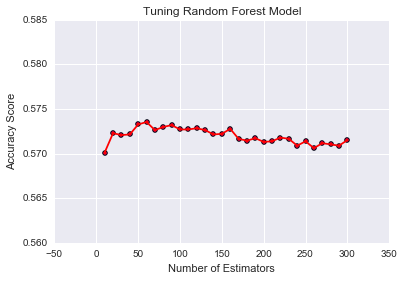

In [44]:
#plot results
print test
import matplotlib.pyplot as plt
n = []
v = []
for est, val in test:
    n.append(est)
    v.append(val)

print n
print v
plt.title('Tuning Random Forest Model')
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Estimators')
plt.scatter(n, v, linewidths = 1)
plt.plot(n,v,'.r-')
plt.show()


In [45]:
# list of values to try for max_features
X = justice[feature_cols1]
feature_range = range(1, 23)

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)

def eval_rf2(Xf, yf, rand, feature):
    rf_tuple = []
    X_tr, X_te, y_tr, y_te = train_test_split(Xf, yf, random_state=rand)
    y_tr2=y_tr.astype(int)
    y_te2=y_te.astype(int)
    for f in feature:
        rfcl = RandomForestClassifier(n_estimators=240, random_state=1, max_features=f)
        rfcl.fit(X_tr, y_tr2)
        y_pc = rfcl.predict(X_te)
        y_pc2 = y_pc.astype(int)
        met = (metrics.accuracy_score(y_te2, y_pc2))
        rf_tuple.append((f, met))
        print f
    return rf_tuple


In [46]:
test2 = eval_rf2(X1,y,150,feature_range)
print test2

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
[(1, 0.57095018836333189), (2, 0.57095018836333189), (3, 0.5708106599693038), (4, 0.5708106599693038), (5, 0.57088042416631779), (6, 0.57088042416631779), (7, 0.57088042416631779), (8, 0.57095018836333189), (9, 0.57088042416631779), (10, 0.57095018836333189), (11, 0.57101995256034599), (12, 0.57101995256034599), (13, 0.57129900934840239), (14, 0.57122924515138829), (15, 0.57115948095437419), (16, 0.57122924515138829), (17, 0.57101995256034599), (18, 0.57095018836333189), (19, 0.57095018836333189), (20, 0.57088042416631779), (21, 0.57101995256034599), (22, 0.57095018836333189)]


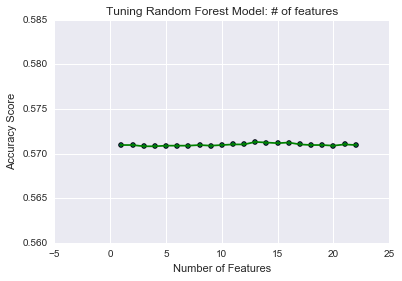

In [48]:
#plot results
import matplotlib.pyplot as plt
n = []
v = []
for est, val in test2:
    n.append(est)
    v.append(val)

plt.title('Tuning Random Forest Model: # of features')
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Features')
plt.scatter(n, v, linewidths = 1)
plt.plot(n,v,'.g-')
plt.show()

In [50]:
# max_features=12 is best and n_estimators=60 is sufficiently large
feature_cols1 = ['gd_f', 'deg_Doctorate', 'deg_Less than Secondary',
                  "deg_Master's", 'deg_Secondary', #"deg_Bachelor's",
 'age', 'cty_Unknown/Other', #'cty_United States'
 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 
 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 
 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 
 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 
 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece',
 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']
X=justice[feature_cols1]
y = justice['outcome']
rfcl = RandomForestClassifier(n_estimators=240, max_features=12, oob_score=True, random_state=1)
rfcl.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=12, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=240, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [51]:
# compute feature importances
pd.DataFrame({'feature':feature_cols1, 'importance':rfcl.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
6,cty_Unknown/Other,0.529093
5,age,0.280267
4,deg_Secondary,0.017142
0,gd_f,0.016817
8,cty_Other Europe,0.013898
3,deg_Master's,0.012089
23,cty_Germany,0.007859
10,cty_United Kingdom,0.007578
7,cty_India,0.006909
29,cty_Other East Asia,0.006052


In [52]:
# compute the out-of-bag R-squared score
rfcl.oob_score_

0.57742081763638897